<a href="https://colab.research.google.com/github/shubhu1026/AI-ML/blob/main/Advanced_Deep_Learning_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

### Importing Dataset

In [ ]:
df = pd.read_csv('prices-split-adjusted.csv')

df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print(df['symbol'].unique())

['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0


### Label Encoding the Symbols

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

label_encoder = LabelEncoder()
df['symbol'] = label_encoder.fit_transform(df['symbol'])

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
251,2010-01-04,0,22.453504,22.389128,22.267525,22.625180,3815500.0
718,2010-01-05,0,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,2010-01-06,0,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,2010-01-07,0,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,2010-01-08,0,21.917024,22.031474,21.745350,22.067240,3733900.0


### Function for Creating Sequence

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 0])
    return np.array(X), np.array(y)

### Grouping by Symbol and Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

sequence_length = 10

numerical_features = ['open', 'close', 'low', 'high', 'volume']
categorical_features = ['symbol']

scalers = {}

all_data = []

grouped_by_symbol = df.groupby('symbol')

for symbol, group in grouped_by_symbol:
    numerical_data = group[numerical_features].values
    categorical_data = group[categorical_features].values

    scaler = MinMaxScaler()
    numerical_scaled = scaler.fit_transform(numerical_data)

    scalers[symbol] = scaler

    processed_data = np.hstack((numerical_scaled, categorical_data))

    X, y = create_sequences(processed_data, sequence_length)

    all_data.append((X, y))

joblib.dump(scalers, "all_stock_scalers.pkl")

['all_stock_scalers.pkl']

### Train, Test, Val Split

In [ ]:
from sklearn.model_selection import train_test_split

X_all = np.concatenate([x for x, y in all_data], axis=0)
y_all = np.concatenate([y for x, y in all_data], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
print("Shape of X:", X_all.shape)
print("Shape of y:", y_all.shape)

Shape of X: (846254, 10, 6)
Shape of y: (846254,)


In [ ]:
print("Shape of X Train:", X_train.shape)
print("Shape of y Train:", y_train.shape)

Shape of X Train: (609302, 10, 6)
Shape of y Train: (609302,)


### LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Early Stopping and Model Checkpoint

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,449 (181.44 KB)

 Trainable params: 46,449 (181.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
19037/19041 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - mae: 0.0274
Epoch 1: val_loss improved from inf to 0.00020, saving model to best_model.keras
19041/19041 ━━━━━━━━━━━━━━━━━━━━ 313s 16ms/step - loss: 0.0031 - mae: 0.0274 - val_loss: 1.9551e-04 - val_mae: 0.0100
Epoch 2/50
19037/19041 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0172e-04 - mae: 0.0099
Epoch 2: val_loss improved from 0.00020 to 0.00013, saving model to best_model.keras
19041/19041 ━━━━━━━━━━━━━━━━━━━━ 296s 15ms/step - loss: 2.0172e-04 - mae: 0.0099 - val_loss: 1.2977e-04 - val_mae: 0.0071
Epoch 3/50
19037/19041 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7413e-04 - mae: 0.0090
Epoch 3: val_loss did not improve from 0.00013
19041/19041 ━━━━━━━━━━━━━━━━━━━━ 311s 14ms/step - loss: 1.7413e-04 - mae: 0.0090 - val_loss: 1.7486e-04 - val_mae: 0.0096
Epoch 4/50
19038/19041 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5521e-04 - mae: 0.0086
Epoch 4: val_loss improved from 0.00013 to 0.00012, saving model to b

### Training, Validation MAE & MSE plots

In [ ]:
history_dict = history.history
train_mse = history_dict['loss']
val_mse = history_dict['val_loss']
train_mae = history_dict['mae']
val_mae = history_dict['val_mae']
epochs = range(1, len(train_mse) + 1)

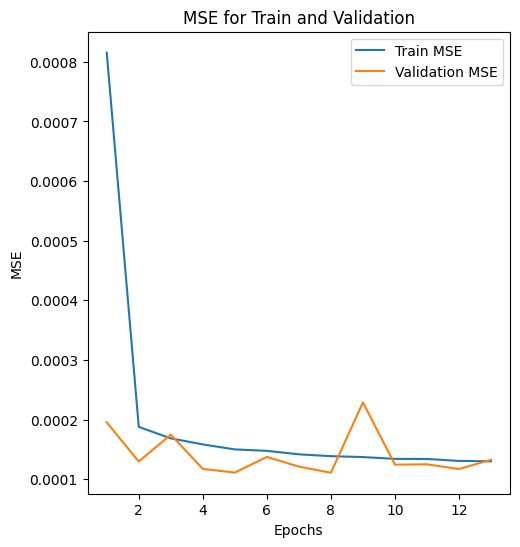

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_mse, label='Train MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('MSE for Train and Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

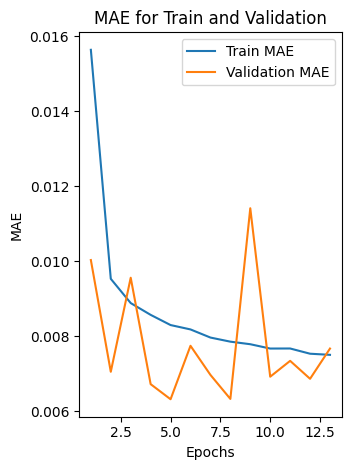

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, label='Train MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('MAE for Train and Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print(f'Test Loss: {results[0]}')
print(f'Test MAE: {results[1]}')

5290/5290 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 1.0839e-04 - mae: 0.0063
Test Loss: 0.00010621223918860778
Test MAE: 0.006258080713450909


In [ ]:
y_pred = model.predict(X_test)

5290/5290 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.9984920887472195


### Predictions v/s True Values

5290/5290 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step


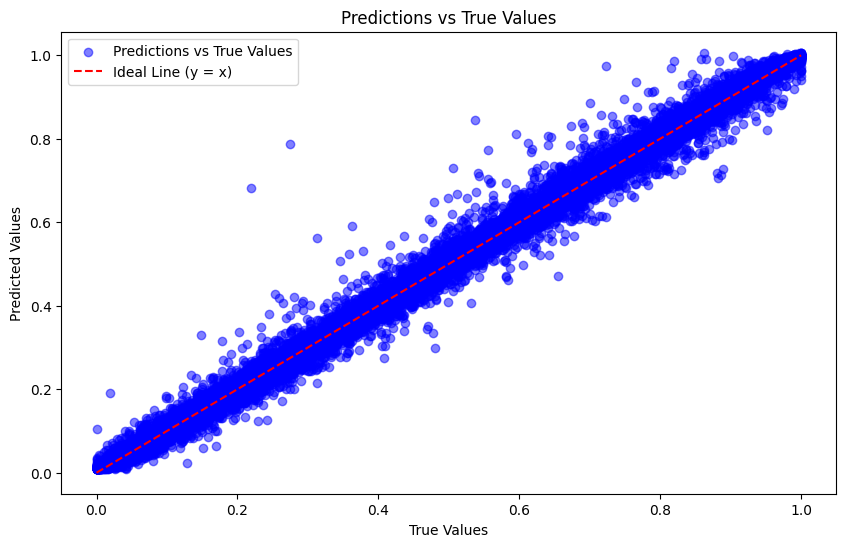

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions vs True Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs True Values')
plt.legend()
plt.show()

5290/5290 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step


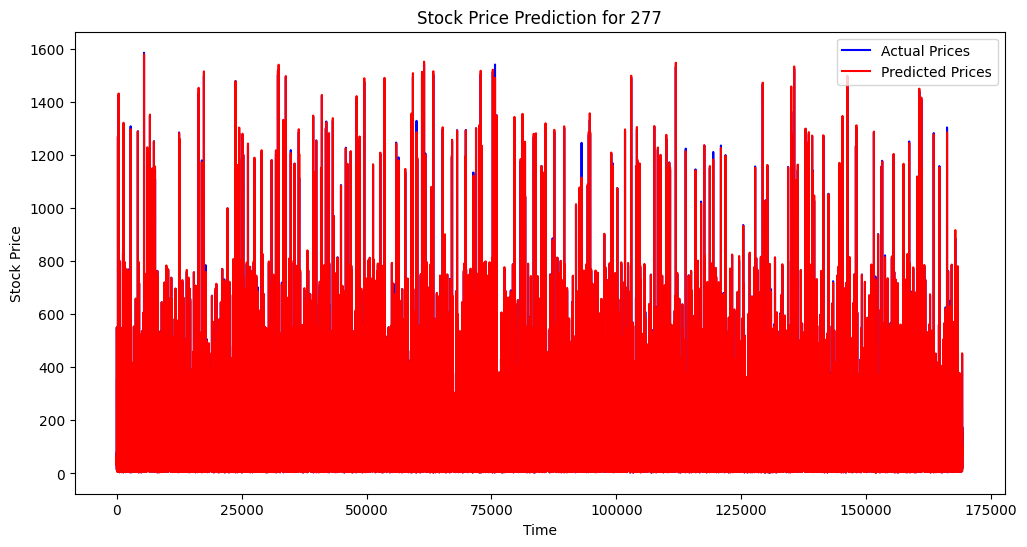

In [ ]:
scalers = joblib.load("all_stock_scalers.pkl")

y_pred_scaled = model.predict(X_test)

y_test_original = []
y_pred_original = []

for i in range(len(y_test)):
    symbol = int(X_test[i, 0, -1])

    scaler = scalers[symbol]

    # dummy arrays for inverse transform
    dummy_y_test = np.zeros((1, scaler.n_features_in_))
    dummy_y_pred = np.zeros((1, scaler.n_features_in_))

    # Setting first column before inverse transform
    dummy_y_test[:, 0] = y_test[i]
    dummy_y_pred[:, 0] = y_pred_scaled[i]

    # inverse transformation
    y_test_original.append(scaler.inverse_transform(dummy_y_test)[:, 0][0])
    y_pred_original.append(scaler.inverse_transform(dummy_y_pred)[:, 0][0])

y_test_original = np.array(y_test_original)
y_pred_original = np.array(y_pred_original)
s
time = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual Prices", color='blue')
plt.plot(y_pred_original, label="Predicted Prices", color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {symbol}")
plt.show()